In [30]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Ensure the necessary NLTK resources are downloaded
import nltk
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('/content/Sentiment _data.csv')

# Check the first few rows to ensure it's loaded correctly
print(data.head())

# Step 1: Clean the text data
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Step 2: Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Split the text into words
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Step 3: Apply cleaning functions
data['cleaned_text'] = data['Text'].apply(clean_text)
data['cleaned_text'] = data['cleaned_text'].apply(remove_stopwords)

# Check the cleaned text
print(data['cleaned_text'].head())

# Step 4: Proceed with further steps (e.g., train-test split, model training)


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

# Step 1: Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # We limit the features to the top 5000 terms
X = vectorizer.fit_transform(data['cleaned_text'])

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment'], test_size=0.2, random_state=42)

# Step 3: Train a model (Logistic Regression or Naive Bayes)
# We will use Logistic Regression for this example, but you can also use Multinomial Naive Bayes

# Option 1: Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Option 2: (Alternatively, you could use Naive Bayes)
# model = MultinomialNB()
# model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Step 5: Evaluate the performance of the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.11564625850340136
Classification Report:
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [32]:
from transformers import pipeline

# Simple sentiment/emotion analysis pipeline
classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion", top_k=1)

# Example
text = "Feeling excited for the weekend!"
result = classifier(text)
print(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


[[{'label': 'joy', 'score': 0.9984071850776672}]]


In [33]:
# Mapping fine-grained emotions to coarse ones
label_map = {
    'Joy': 'Positive', 'Excitement': 'Positive', 'Euphoria': 'Positive',
    'Anger': 'Negative', 'Frustration': 'Negative', 'Hate': 'Negative',
    'Sadness': 'Negative', 'Melancholy': 'Negative',
    'Neutral': 'Neutral', 'Boredom': 'Neutral'
    # Add more as needed
}

# Apply mapping
data['Sentiment_Coarse'] = data['Sentiment'].map(label_map)

# Drop rows with unmapped sentiments (optional)
data = data.dropna(subset=['Sentiment_Coarse'])


In [34]:
# Define a mapping dictionary for grouping
label_map = {
    # Positive sentiments
    'Joy': 'Positive', 'Excitement': 'Positive', 'Euphoria': 'Positive',
    'Contentment': 'Positive', 'Admiration': 'Positive', 'Grateful': 'Positive',
    'Affection': 'Positive', 'Empowerment': 'Positive', 'Inspiration': 'Positive',
    'Hopeful': 'Positive', 'Proud': 'Positive', 'Captivation': 'Positive',

    # Negative sentiments
    'Anger': 'Negative', 'Frustration': 'Negative', 'Sadness': 'Negative',
    'Fear': 'Negative', 'Hate': 'Negative', 'Heartbreak': 'Negative',
    'Disgust': 'Negative', 'Desolation': 'Negative', 'Grief': 'Negative',
    'Betrayal': 'Negative', 'Loneliness': 'Negative', 'Devastated': 'Negative',

    # Neutral or unclear sentiments
    'Neutral': 'Neutral', 'Confusion': 'Neutral', 'Ambivalence': 'Neutral',
    'Contemplation': 'Neutral', 'Nostalgia': 'Neutral', 'Serenity': 'Neutral'
}

# Apply the mapping to your data
data['Sentiment_Grouped'] = data['Sentiment'].map(label_map)

# Drop rows where mapping failed (i.e., NaN values)
data = data.dropna(subset=['Sentiment_Grouped'])

# View the distribution
print(data['Sentiment_Grouped'].value_counts())


Series([], Name: count, dtype: int64)


In [35]:
import re
import string

def clean_text_simple(text):
    text = str(text).lower()                          # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@w+|\#','', text)                # Remove mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)               # Remove punctuation
    text = re.sub(r'\d+', '', text)                   # Remove digits
    return text.strip()

# Apply cleaning
data['cleaned_text'] = data['Text'].apply(clean_text_simple)


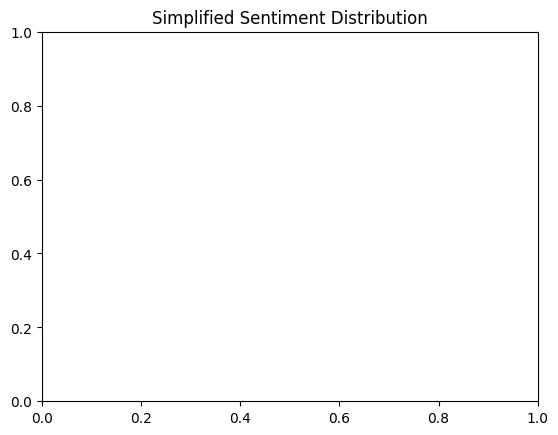

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment_Grouped', data=data)
plt.title("Simplified Sentiment Distribution")
plt.show()
